### Importing relevent Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
raw_data=pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing (Data Cleaning)

In [3]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


it didn't describe whole data which are not numeric

so, we can use the .describe(include='all') to do that

In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
data=raw_data.drop(['Model'],axis=1)

In [6]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


count are not the same for each and every feature
so, there are missing value in it

so, we need to findout and drop those missing values


In [7]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

isnull shows the dataframe where notnull value is assign with false
and null value is assign with true

so, we can add the true value of the missing rows because true is 1 and false is 0

it can give us the sum of the total


In [8]:
data_no_mv=data.dropna(axis=0)

In [9]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


now we having the equal number of values in the count 

### Exploring PDFs

we can print the pdf of each feature to see there structure

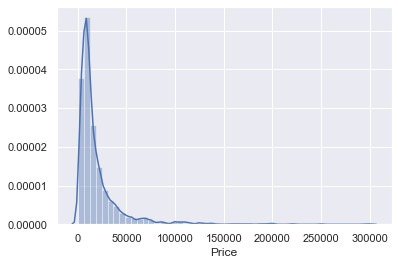

In [10]:
sns.distplot(data_no_mv['Price'])

In [11]:
q=data_no_mv['Price'].quantile(0.99)

In [12]:
q

129812.51999999981

so we what we are doing is to get the 99 percentile and keep the data below 99 percentile

which we can use to make the dataframe which having less then the quantile value of data in it

In [13]:
data_1=data_no_mv[data_no_mv['Price']<q]

In [14]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


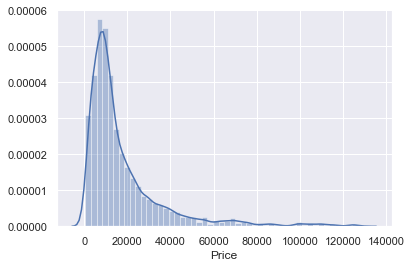

In [15]:
sns.distplot(data_1['Price'])

similar situation is in the Mileage and the EngineV

so we need to remove the outliers 
in the same way as we did with the price 99 percentile

what basically we doing is removing 1 percentile from the top of the distribuation 
to eleminate the outliers 

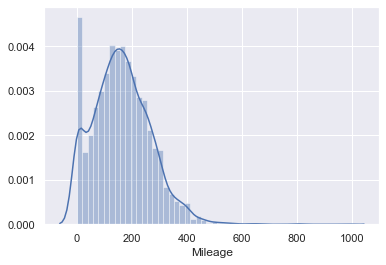

In [16]:
sns.distplot(data_no_mv['Mileage'])

In [17]:
q_mileage=data_no_mv['Mileage'].quantile(0.99)
data_2=data_1[data_1['Mileage']<q_mileage]

In [18]:
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3943,3943.000000,3943,3943.000000,3943.000000,3943,3943,3943.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1510,NaN,NaN,1825,3575,NaN
mean,NaN,17936.780614,NaN,161.414659,2.747497,NaN,NaN,2006.393102
std,NaN,19009.750360,NaN,95.940408,4.981033,NaN,NaN,6.593870
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21417.500000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


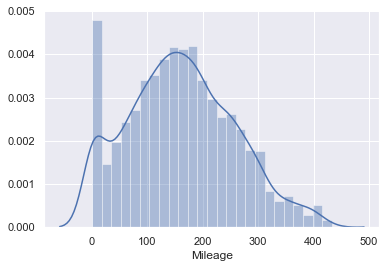

In [19]:
sns.distplot(data_2['Mileage'])

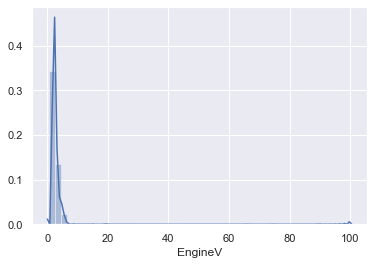

In [20]:
sns.distplot(data_2['EngineV'])

In [21]:
data_3=data_2[data_2['EngineV']<6.5]

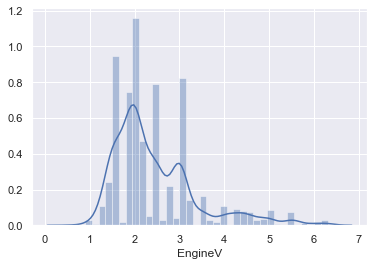

In [22]:
sns.distplot(data_3['EngineV'])

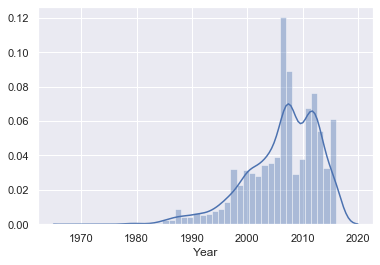

In [23]:
sns.distplot(data_3['Year'])

In [24]:
q_year=data_no_mv['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q_year]

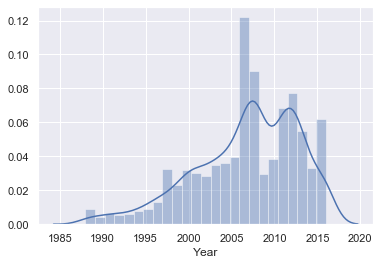

In [25]:
sns.distplot(data_4['Year'])

In [26]:
data_cleaned=data_4.reset_index(drop=True)

In [27]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## OLS Assumption

### Linearity

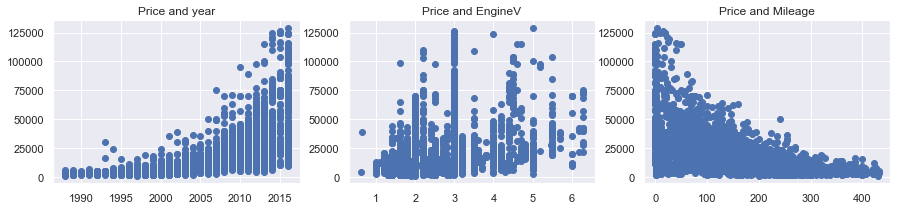

In [28]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

these visual representation of the graphs were showing that there is no linearity in these combinations

so, to fix the first asumption we need to transform the data into the log transform by using the np.log(x)
basically the price graph represent the exponential behaviour so we need to transform it into log transformation

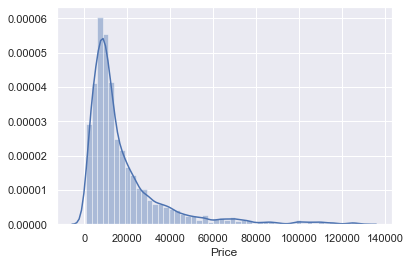

In [29]:
sns.distplot(data_cleaned['Price'])

In [30]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price

In [31]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3861,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3862,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3863,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3864,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


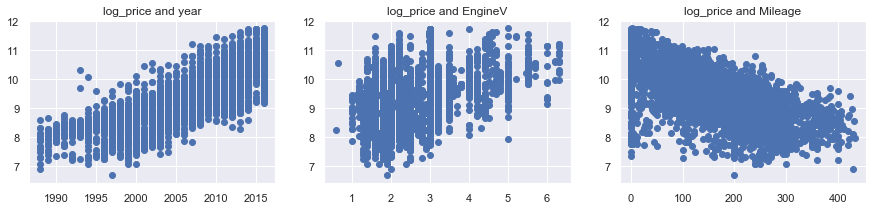

In [32]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

plt.show()

In [33]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

In [34]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3861,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3862,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3863,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3864,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


### Multicollinearity

In [35]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
variables=data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif['Features']=variables.columns
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]

In [38]:
vif

,Features,VIF
0,Mileage,3.794319
1,Year,10.360888
2,EngineV,7.660317


In [39]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)

In [40]:
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3861,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3862,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3863,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3864,BMW,sedan,1,3.5,Petrol,yes,8.779557


### Creating the dumies

In [41]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [42]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3862,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3863,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3864,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [43]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [44]:
dummy_variables=data_with_dummies[['Mileage','EngineV','Brand_BMW','Brand_Mercedes-Benz','Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']]
dummy_vif=pd.DataFrame()
dummy_vif['Features']=dummy_variables.columns
dummy_vif['VIF']=[variance_inflation_factor(dummy_variables.values,i) for i in range(dummy_variables.shape[1])]

In [45]:
dummy_vif

,Features,VIF
0,Mileage,4.463028
1,EngineV,7.840499
2,Brand_BMW,2.294326
3,Brand_Mercedes-Benz,2.865534
4,Brand_Mitsubishi,1.641825
5,Brand_Renault,2.086774
6,Brand_Toyota,2.162211
7,Brand_Volkswagen,2.844590
8,Body_hatch,1.464597
9,Body_other,1.534624


In [46]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [47]:
col=['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [48]:
data_preprocessed=data_with_dummies[col]

In [49]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Regression Itself

#### Declare Inputs and targets

In [50]:
targets=data_preprocessed['log_price']
inputs=data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
input_scaled=scaler.transform(inputs)

### Train and Test Split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(input_scaled,targets,test_size=0.2,random_state=356)

### Regression

In [56]:
reg=LinearRegression()

In [57]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
yhat=reg.predict(x_train)

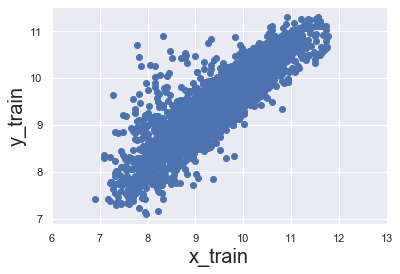

In [59]:
plt.scatter(y_train,yhat)
plt.xlabel('x_train',fontsize=20)
plt.ylabel('y_train',fontsize=20)
plt.xlim(6,13)
plt.xlim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

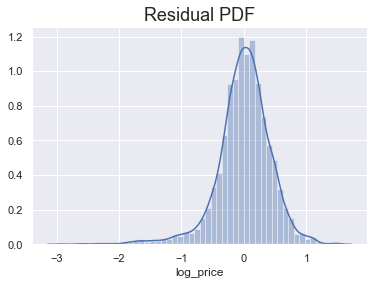

In [60]:
sns.distplot(y_train-yhat)
plt.title('Residual PDF',size=18)

In [61]:
reg.score(x_train,y_train)

0.7562196069608136

In [62]:
reg.coef_

array([-0.46750426,  0.22232092,  0.01948769,  0.01087479, -0.13416291,
       -0.1833784 , -0.05917027, -0.08320679, -0.13624083, -0.09682629,
       -0.18636817, -0.12129446, -0.15645465, -0.12527372, -0.03276422,
       -0.15409204,  0.3174386 ])

In [63]:
reg.intercept_

9.415025235663105

In [64]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=reg.coef_

In [65]:
reg_summary

,Features,Weights
0,Mileage,-0.467504
1,EngineV,0.222321
2,Brand_BMW,0.019488
3,Brand_Mercedes-Benz,0.010875
4,Brand_Mitsubishi,-0.134163
5,Brand_Renault,-0.183378
6,Brand_Toyota,-0.059170
7,Brand_Volkswagen,-0.083207
8,Body_hatch,-0.136241
9,Body_other,-0.096826


### weight interpetation


A positive weight shows that as a feature increase in value, so do the log_price and price increases
example in the above dataframe we can say that EngineV is in positive so greater the engine volume greater the price is 

A negative weight shows that as a feature increase in value, so do the lo_price and price decreases
example in the above dataframe Mileage is in negative so we can interpret that as mileage of a car decrease as the price of the car is also decreases


#### For the dummy variables
Audi is our benchmark

a positive weight shows that the respective brand is more expensive than the audi

a negative weight shows that the respective brand is less expensive than the audi

### Testing

In [66]:
yhat_test=reg.predict(x_test)

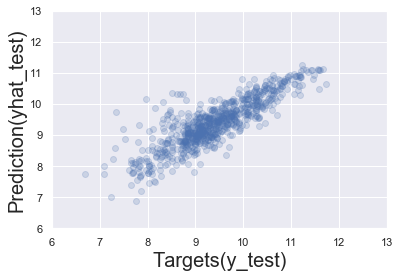

In [67]:
plt.scatter(y_test,yhat_test,alpha=0.2)
plt.xlabel("Targets(y_test)",size=20)
plt.ylabel("Prediction(yhat_test)",size=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [70]:
df_performance=pd.DataFrame(np.exp(yhat_test),columns=['Prediction'])
df_performance.head()

,Prediction
0,30710.440277
1,11854.599089
2,7706.500634
3,9921.188649
4,8699.716626


In [73]:
df_performance['Targets']=np.exp(y_test)

In [74]:
df_performance

,Prediction,Targets
0,30710.440277,NaN
1,11854.599089,NaN
2,7706.500634,NaN
3,9921.188649,NaN
4,8699.716626,NaN
...,...,...
769,9041.763157,NaN
770,8935.134237,NaN
771,12431.178338,NaN
772,11211.954847,NaN


In [75]:
y_test=y_test.reset_index(drop=True)

In [76]:
df_performance['Targets']=np.exp(y_test)
df_performance

,Prediction,Targets
0,30710.440277,29900.0
1,11854.599089,16999.0
2,7706.500634,11200.0
3,9921.188649,3350.0
4,8699.716626,11950.0
...,...,...
769,9041.763157,9300.0
770,8935.134237,7200.0
771,12431.178338,13200.0
772,11211.954847,10200.0


In [77]:
df_performance['Residual']=df_performance['Targets']-df_performance['Prediction']

In [78]:
df_performance

,Prediction,Targets,Residual
0,30710.440277,29900.0,-810.440277
1,11854.599089,16999.0,5144.400911
2,7706.500634,11200.0,3493.499366
3,9921.188649,3350.0,-6571.188649
4,8699.716626,11950.0,3250.283374
...,...,...,...
769,9041.763157,9300.0,258.236843
770,8935.134237,7200.0,-1735.134237
771,12431.178338,13200.0,768.821662
772,11211.954847,10200.0,-1011.954847


In [81]:
df_performance['Difference %']=np.absolute(df_performance['Residual']/df_performance['Targets']*100)

In [82]:
df_performance

,Prediction,Targets,Residual,Difference %
0,30710.440277,29900.0,-810.440277,2.710503
1,11854.599089,16999.0,5144.400911,30.262962
2,7706.500634,11200.0,3493.499366,31.191959
3,9921.188649,3350.0,-6571.188649,196.154885
4,8699.716626,11950.0,3250.283374,27.199024
...,...,...,...,...
769,9041.763157,9300.0,258.236843,2.776740
770,8935.134237,7200.0,-1735.134237,24.099087
771,12431.178338,13200.0,768.821662,5.824407
772,11211.954847,10200.0,-1011.954847,9.921126


In [83]:
df_performance.describe()

,Prediction,Targets,Residual,Difference %
count,774.000000,774.000000,774.000000,774.000000
mean,16049.157560,17622.305284,1573.147724,39.078922
std,13207.917601,18114.124035,9082.430291,71.415012
min,956.644156,800.000000,-28169.490486,0.004976
25%,7449.937271,7000.000000,-2051.629738,11.988583
50%,11764.652530,11200.000000,380.079232,23.816859
75%,19377.450387,21500.000000,3616.431390,41.117522
max,76981.922781,125000.000000,83156.496186,1000.958396


In [84]:
df_performance.sort_values(by=['Difference %'])

,Prediction,Targets,Residual,Difference %
205,6300.313501,6300.0,-0.313501,0.004976
202,10604.427542,10600.0,-4.427542,0.041769
568,9691.481882,9700.0,8.518118,0.087816
160,32554.691907,32500.0,-54.691907,0.168283
604,17460.347746,17500.0,39.652254,0.226584
...,...,...,...,...
740,19528.521224,3500.0,-16028.521224,457.957749
637,23567.186664,4099.0,-19468.186664,474.949662
722,31323.975332,4999.0,-26324.975332,526.604828
56,26232.517683,2900.0,-23332.517683,804.569575


In [87]:
pd.options.display.max_rows=999

df_performance.sort_values(by=['Difference %'])

,Prediction,Targets,Residual,Difference %
205,6300.313501,6300.00,-0.313501,0.004976
202,10604.427542,10600.00,-4.427542,0.041769
568,9691.481882,9700.00,8.518118,0.087816
160,32554.691907,32500.00,-54.691907,0.168283
604,17460.347746,17500.00,39.652254,0.226584
686,12228.876538,12200.00,-28.876538,0.236693
655,21386.990854,21335.00,-51.990854,0.243688
294,4312.055471,4300.00,-12.055471,0.280360
682,33795.745593,33900.00,104.254407,0.307535
583,10839.797572,10800.00,-39.797572,0.368496
